kgmyh@naver.com 으로 `이름_주유소가격 데이터 분석.html` 로 제출
- html 파일로 변환
    - File > Download as > HTML (.html) 선택

# 데이터 불러오기

- 2022년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [36]:
# 상반기, 하반기 주유소 가격 데이터 파일로 부터 읽기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
first=pd.read_csv("data/2022년_서울_상반기_일별_가격.csv",encoding="euc-kr") # 상반기
latter= pd.read_csv("data/2022년_서울_하반기_일별_가격.csv",encoding="euc-kr") # 하반기
first.shape,latter.shape,82689+81793

((82689, 11), (81793, 11), 164482)

In [4]:
# 상반기, 하반기 DataFrame 합치기
station = pd.concat([first, latter],ignore_index= True) #ignore_index False로 할 경우, 인덱스 값까지 합쳐지기에 True로 한다
station[81685:81702] # 합쳐진거 확인

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
81685,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220201,SK에너지,셀프,0,1678,1489,1250
81686,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220202,SK에너지,셀프,0,1678,1489,1250
81687,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220203,SK에너지,셀프,0,1678,1489,1250
81688,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220204,SK에너지,셀프,0,1678,1489,1250
81689,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220205,SK에너지,셀프,0,1678,1489,1250
81690,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220206,SK에너지,셀프,0,1698,1508,1250
81691,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220207,SK에너지,셀프,0,1698,1508,1250
81692,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220208,SK에너지,셀프,0,1698,1508,1250
81693,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220209,SK에너지,셀프,0,1698,1508,1250
81694,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),20220210,SK에너지,셀프,0,1698,1508,1250


In [5]:
# DataFrame 기본 정보 조회
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 13.8+ MB


In [6]:
# 상표 컬럼의 고유값 조회
station['상표'].unique() # 컬럼의 대표 나오는 값들 
station['상표'].value_counts() # 컬럼의 대표로 나오는 값들과 갯수


상표
SK에너지     48267
현대오일뱅크    42351
GS칼텍스     40449
S-OIL     28762
알뜰주유소      3551
자가상표        737
알뜰(ex)      365
Name: count, dtype: int64

In [7]:
# 지역 컬럼의 고유값 조회
station['지역'].unique() # 지역의 대표 나오는 값들 
station['지역'].value_counts() # 지역의 대표로 나오는 값들과 갯수
# (count)갯수는 25개, 총량(sum)은 164482 개

지역
서울 강남구     12278
서울 강서구     11825
서울 송파구     11295
서울 서초구     11231
서울 영등포구     9814
서울 양천구      9015
서울 성북구      8522
서울 구로구      7384
서울 동대문구     6574
서울 성동구      6006
서울 도봉구      5992
서울 은평구      5807
서울 노원구      5474
서울 서대문구     5472
서울 강동구      5110
서울 광진구      5107
서울 관악구      5104
서울 중랑구      4873
서울 용산구      4637
서울 강북구      4460
서울 마포구      4375
서울 금천구      4067
서울 중구       3643
서울 동작구      3436
서울 종로구      2981
Name: count, dtype: int64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [22]:
# 시도 해본 것
# gus=station['지역'].value_counts().index
# gu1=[]
# for i in gus:
#     if "서울" in i:
#         e=i.replace("서울","").strip()
#         gu1.append(e)
# station["구"]=statio

# station["요일"].apply(change)

In [9]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)
station["구"]=station['지역'].str.split().str[1] # 파생 변수 쉽게 그냥 객체.변수를 지정해서 값을 넣어준다고 새악 
station

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0,중랑구
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0,중랑구
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0,중랑구
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0,중랑구


In [23]:
station['기간']

0        2022-01-01
1        2022-01-02
2        2022-01-03
3        2022-01-04
4        2022-01-05
            ...    
164477   2022-12-27
164478   2022-12-28
164479   2022-12-29
164480   2022-12-30
164481   2022-12-31
Name: 기간, Length: 164482, dtype: datetime64[ns]

In [24]:
# 기간 컬럼을 datetime 타입으로 변경
station['기간']=pd.to_datetime(station['기간'], format="ISO8601")
station

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,1
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,2
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,3
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,4


In [12]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)
station.head(5)
station['월']=station['기간'].dt.month # 1~12
station['일']=station['기간'].dt.day # 1~31
station['요일']= station['기간'].dt.dayofweek # 일-0, 월-1,화-2, 금-5, 토-6
station

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,1
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,2
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,3
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,4


In [32]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경
num=7 
list("월화수목금토일")[num-1]
def change(num):
    return list("월화수목금토일")[num-1]
change(2)

station["요일"]=station["요일"].apply(change)

In [34]:
# 휘발유 가격이 가장 비싼 5개 행 조회
# station['휘발유'].sort_values(ascending=False).head(5) # 여기서 다시 조회하는법??
station.sort_values("휘발유",ascending=False).head(5)  # 내림차순으로 조회
station

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,금
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,토
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,일
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,월
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,월
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,화
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,수
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,목


In [15]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
# station.sort_values("휘발유",ascending=True).head(5)
# station.query("휘발유>0").sort_values("휘발유")
station[station["휘발유"] > 0].sort_values("휘발유") # 생각이 안남

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
99498,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,1
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,5
97840,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-25,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,25,6
148433,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,0
97838,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,6
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,5
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,4
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,3


In [16]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
station.sort_values("고급휘발유",ascending=False).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78940,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-27,SK에너지,일반,3496,3096,3223,2719,중구,6,27,0
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,6
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,5
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,4
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,3


In [17]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
station[station['고급휘발유']>0].sort_values("고급휘발유").head(5)
# station.query("고급휘발유>0").sort_values("고급휘발유").head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
98571,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,12,20,1
98572,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,12,21,2
98573,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,12,22,3
98574,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,12,23,4
98575,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-24,S-OIL,셀프,1599,1499,1729,0,강서구,12,24,5


In [18]:
# 경유 가격이 가장 비싼 5개 행 조회
station.sort_values("경유",ascending=False).head(5)
# station[station["휘발유"] > 0].sort_values("휘발유")

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78942,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-29,SK에너지,일반,3481,3081,3230,2703,중구,6,29,2
160618,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-01,SK에너지,일반,3481,3081,3230,2703,중구,7,1,4
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,6,28,1
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,6,30,3
160621,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-04,SK에너지,일반,3481,3081,3230,2703,중구,7,4,0


In [19]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
# station[station['경유']>0].sort_values("경유") # 첫번째 방식
# station.query("경유>0").sort_values("경유").head(5) # 두번째 방식

In [20]:
# 상표별 휘발유 평균가격 조회
brand=station.groupby('상표')['휘발유'].mean().to_frame()
brand

,휘발유
상표,
GS칼텍스,1904.899429
S-OIL,1859.282595
SK에너지,1908.900823
알뜰(ex),1759.884932
알뜰주유소,1767.914672
자가상표,1823.622795
현대오일뱅크,1839.447215


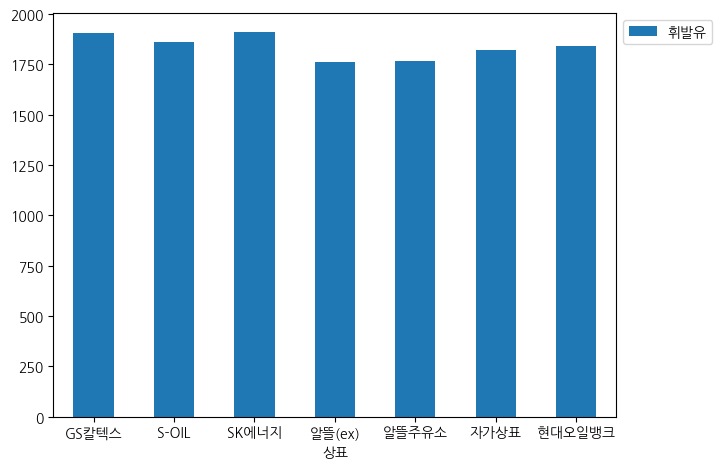

In [21]:
# 상표별 휘발유 평균가격 시각화
# plt
# plt.bar(station['상표'],station['휘발유'] )
# plt.show()

brand.plot(kind="bar",rot=0),
plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [443]:
station

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,1
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,2
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,3
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,4


In [444]:
# 셀프주유소와 일반주유소 개수 확인
# station['셀프여부'].value_counts()
(station['셀프여부']=="셀프").sum() # 헷갈린다
(station['셀프여부']=="일반").sum() 

72004

In [445]:
station

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,1
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,2
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,3
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,4


(<Axes: xlabel='셀프여부'>,)

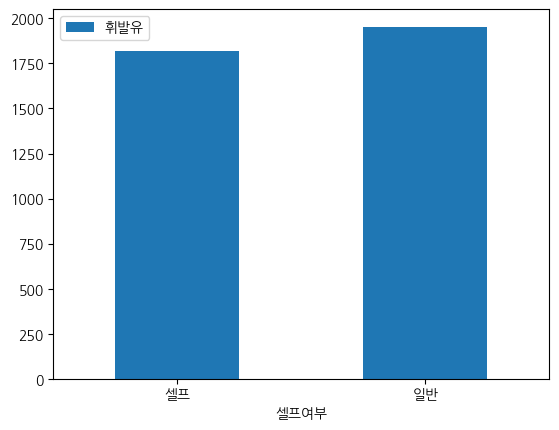

In [446]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 

res=station.groupby('셀프여부')['휘발유'].mean().to_frame() # 첫번째 방식
res.plot(kind="bar",rot=0),


In [447]:
station

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,1
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,2
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,3
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,4


In [448]:
station['셀프여부'].value_counts()

셀프여부
셀프    92478
일반    72004
Name: count, dtype: int64

In [449]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
# red=station.groupby(['상표','셀프여부'])['휘발유'].mean().to_frame() # 첫번째 방법
station.pivot_table(index="상표",columns="셀프여부",values="휘발유",aggfunc="mean")#두번째 방법


셀프여부,셀프,일반
상표,,
GS칼텍스,1825.849350,2001.420217
S-OIL,1820.122748,1932.115939
SK에너지,1826.717027,2003.229520
알뜰(ex),1759.884932,NaN
알뜰주유소,1754.261378,1796.201557
자가상표,2017.000000,1821.768493
현대오일뱅크,1807.265898,1877.606059


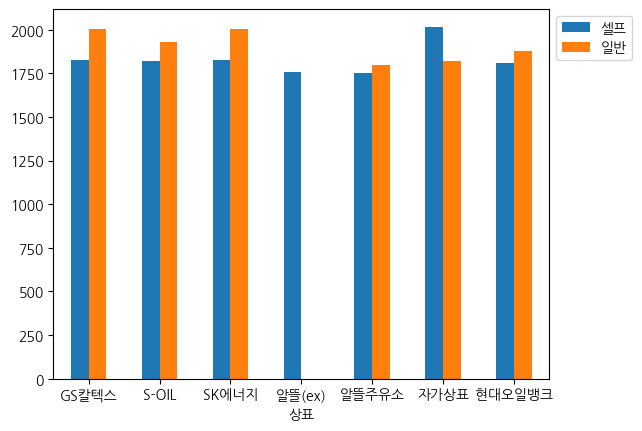

In [450]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
day=station.pivot_table(index="상표",columns="셀프여부",values="휘발유",aggfunc="mean")  # 두번째방법
day.plot(kind='bar', rot=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")


<Axes: xlabel='상표', ylabel='휘발유'>

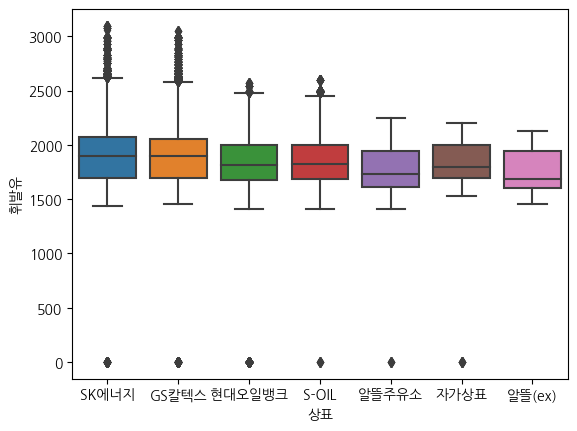

In [451]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
sns.boxplot(x='상표',y='휘발유', data=station)
# rew=station.groupby('상표')['휘발유']
# sns.
# station.pivot_table(index="상표",columns="셀프여부",values="휘발유",aggfunc="mean")

<Axes: xlabel='상표', ylabel='휘발유'>

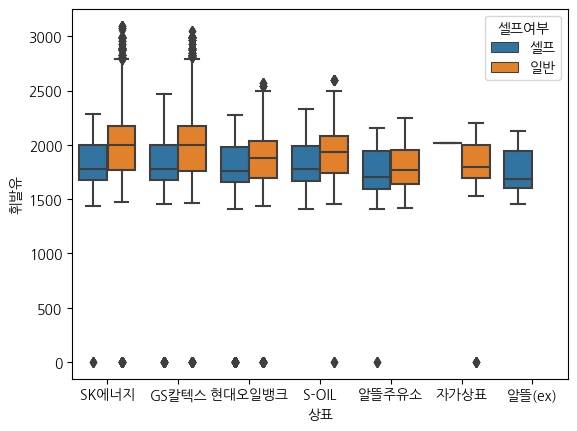

In [452]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
sns.boxplot(x='상표',y='휘발유', hue='셀프여부', data=station)

<Axes: xlabel='구'>

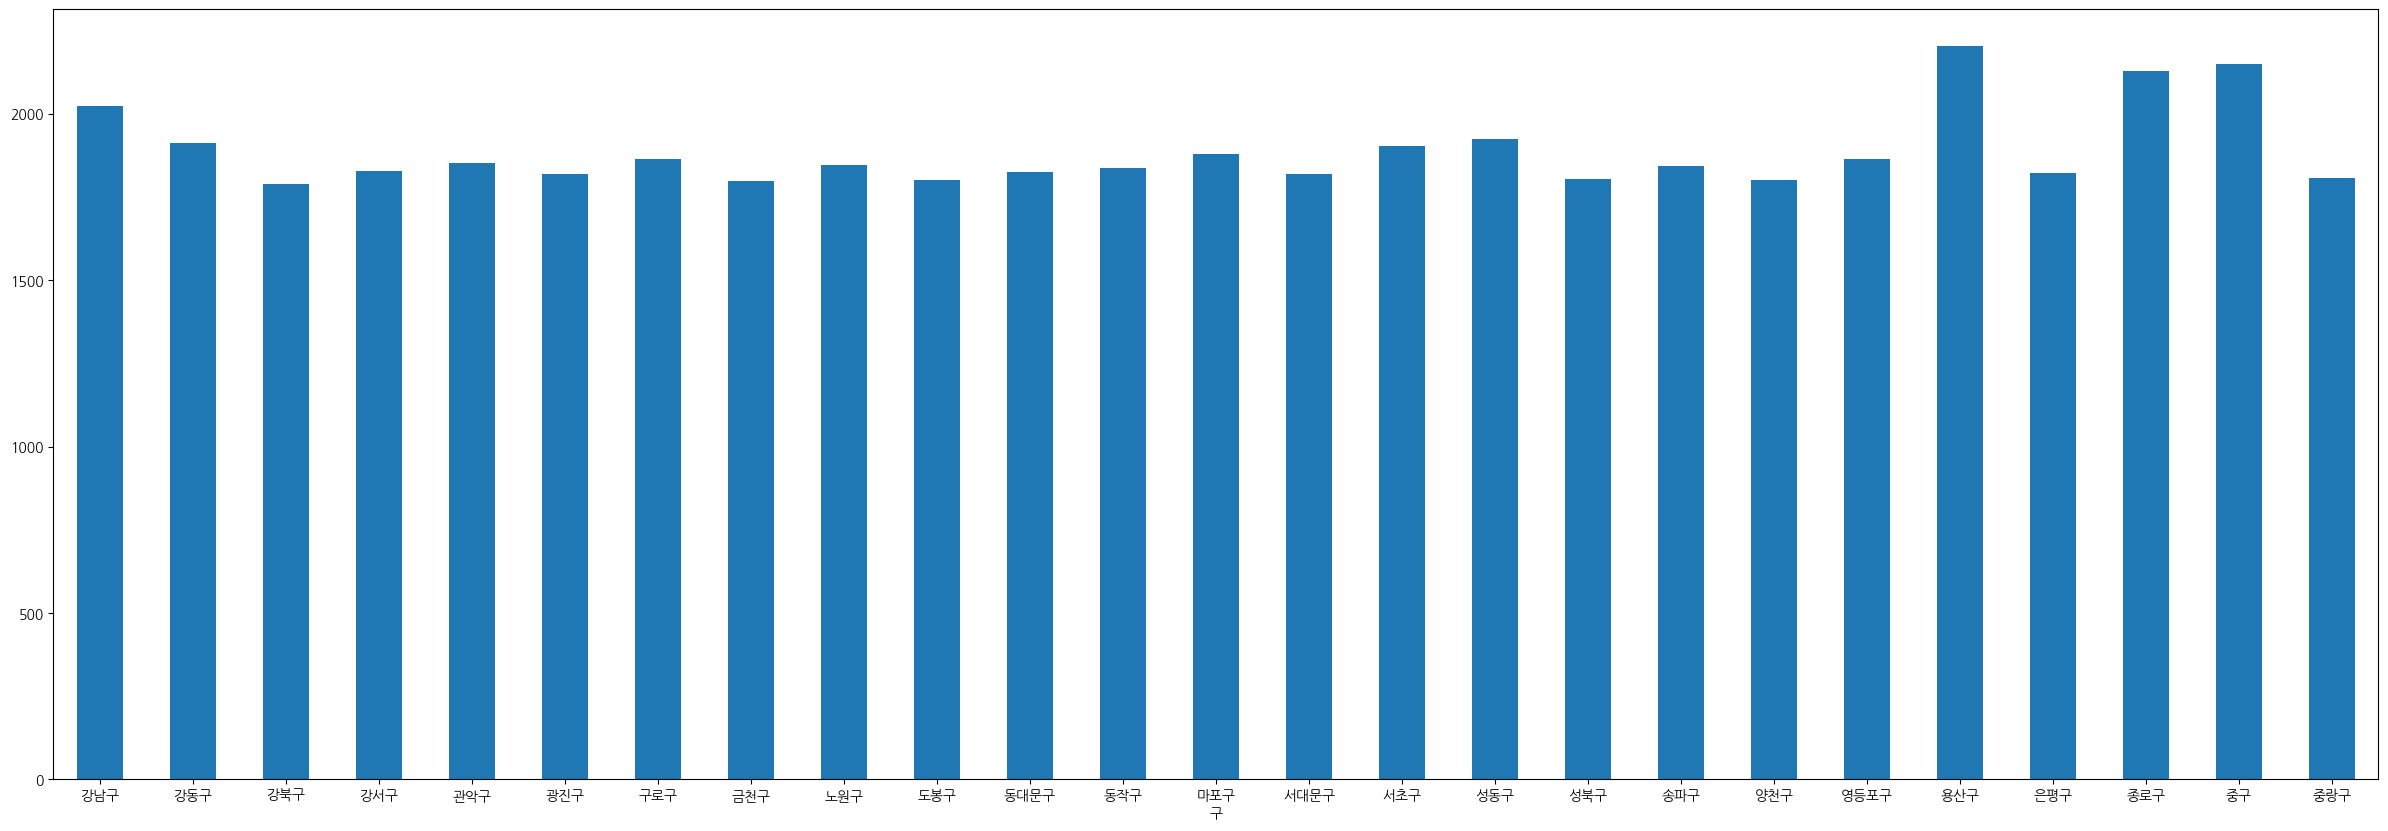

In [453]:
# 구별 휘발유 가격의 평균
gu=station.groupby('구')['휘발유'].mean()
gu.plot(kind='bar', rot =0,figsize=(30,10))

<Axes: xlabel='상표'>

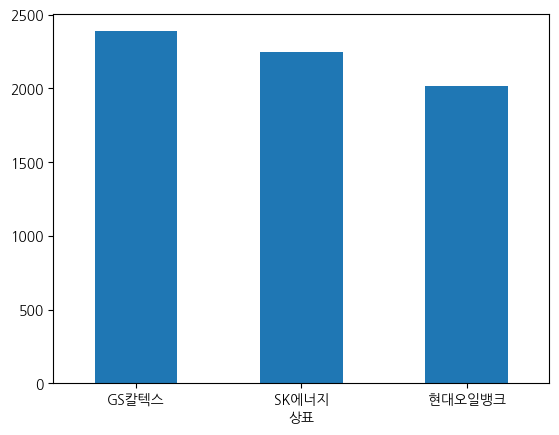

In [464]:
# 평균 가격이 가장 높은 구/의 상표별 휘발유 평균가격
ree=station.groupby('구')['휘발유'].mean().idxmax()
ree_df = station[station['구'] == ree] # station 에서 station[구]의 값이 ree와 같은 값을 ree_df에 넣음
ree_df.groupby('상표')['휘발유'].mean().plot(kind='bar',rot=0)


<Axes: xlabel='월'>

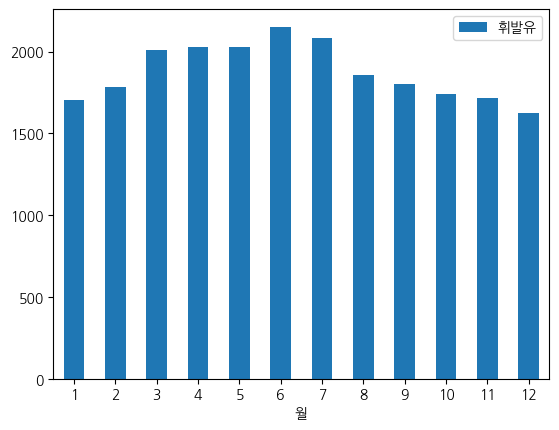

In [471]:
# 월 평균 휘발유 가격
station.groupby('월')['휘발유'].mean().to_frame().plot(kind='bar',rot=0)

In [477]:
# 각 구의 월별 평균 휘발유 가격 
station.groupby(["구","월"])['휘발유'].mean().to_frame()

휘발유
구   월              
강남구 1   1845.037951
    2   1914.714286
    3   2109.476510
    4   2138.078788
    5   2137.114674
...             ...
중랑구 8   1773.062035
    9   1717.466667
    10  1654.116625
    11  1629.458974
    12  1566.585608

[300 rows x 1 columns]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12748\1461943139.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  gak = sns.barplot(data=station, x="월", y="휘발유", hue="구", ci=None) # 내가 원한 것


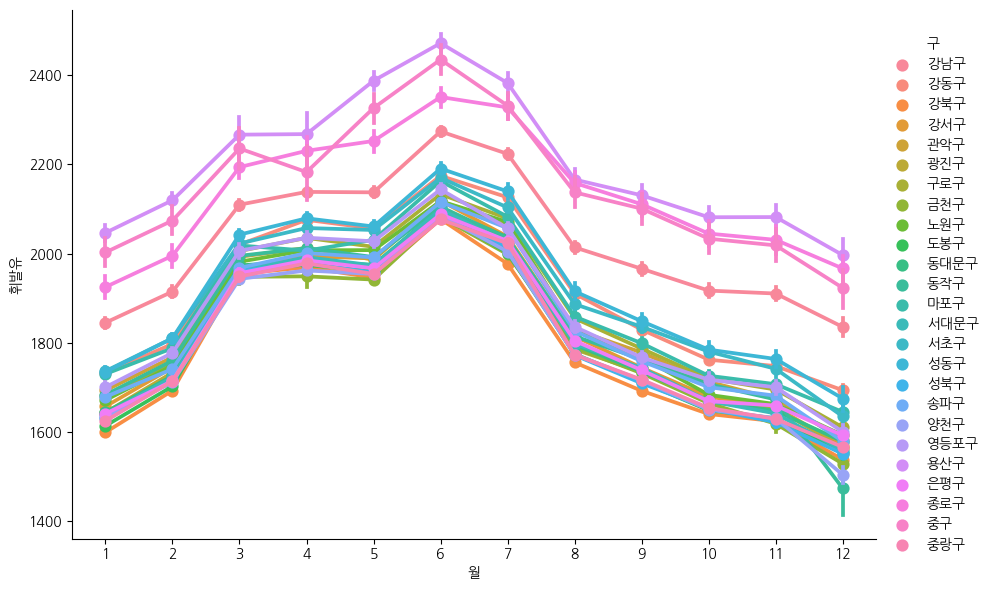

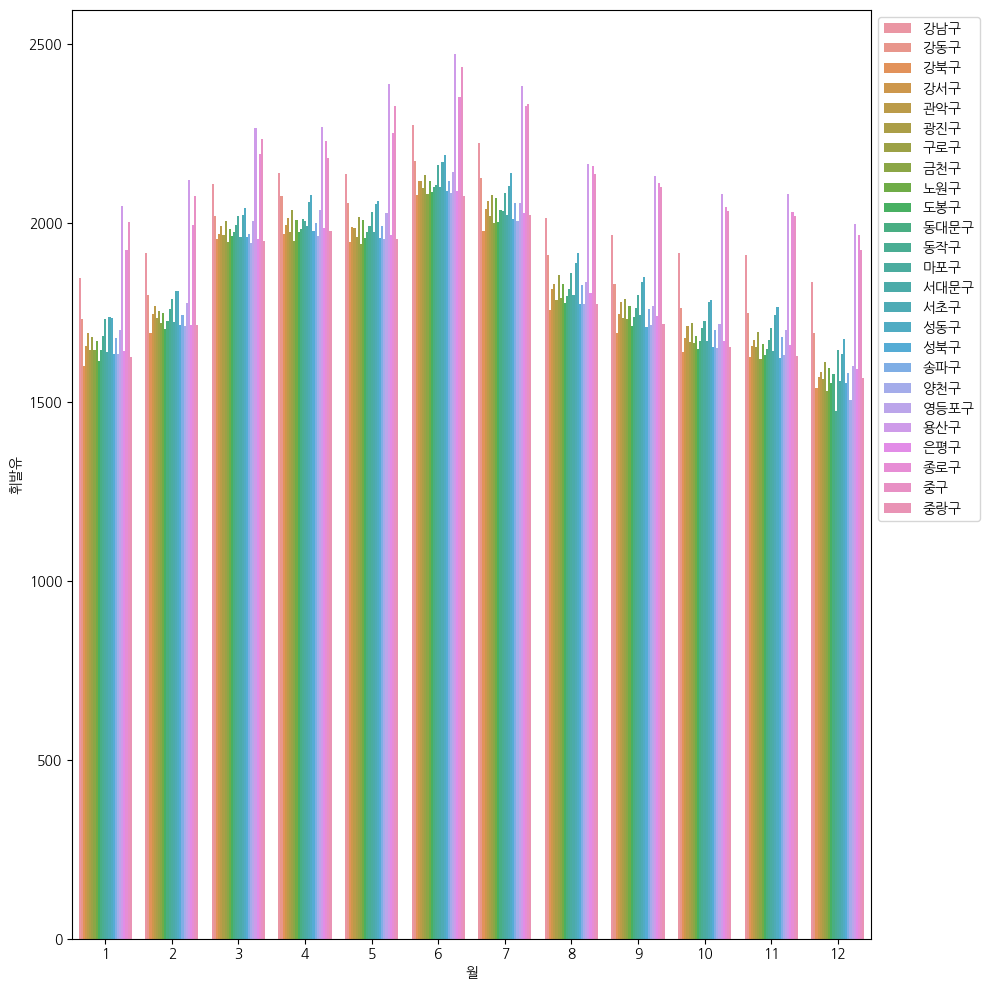

In [501]:
# 각 구의 월별 평균가격의 변화추이 시각화
gak=station.groupby(["구","월"])['휘발유'].mean()
# sns.displot(data=gak, x=["구","월"],hue='휘발유' ) # 내가 한것 bar형태가 더 이쁠거라 생각함
gak = sns.catplot(data=station, x="월", y="휘발유", hue="구", kind="point", height=6, aspect=1.5) #  쳇 GPT 도움을 받아 한 것 
# 
plt.figure(figsize=(10,10))
gak = sns.barplot(data=station, x="월", y="휘발유", hue="구", ci=None) # 내가 원한 것 
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

In [509]:
station

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,1
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,2
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,3
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,4


In [520]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
# station.sort_values("휘발유",ascending=False).head(5)

five_expen=station.groupby('상호')['휘발유'].max().sort_values(ascending=False)
five_expen[:5].to_frame()

,휘발유
상호,
서남주유소,3096
서계주유소,3050
필동주유소,2789
동자동주유소,2690
한석주유소,2681


In [582]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
five_cheap=station.groupby('상호')['휘발유'].min().sort_values(ascending=True) # 0포함
idx = five_cheap[five_cheap > 0].index[:5] # index명 뽑고 0보다 큰 값 5개를 뽑기
five_cheap_top5 = five_cheap.loc[idx] 
five_cheap_top5.to_frame()
# five_cheap=station.loc[station["휘발유"]>0].sort_values("휘발유")  # 두번째 방식 
# chaeep=five_cheap.drop_duplicates(subset="상호")
# chaeep[:5]

,휘발유
상호,
화곡역주유소,1410
현대주유소,1410
이케이에너지(주) 강서주유소,1410
뉴신정주유소,1415
양천구주유소,1430


In [560]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 주소, 상표, 셀프여부,  조회 - 위에서 조회한 결과에 추가 정보(상표, 셀프여부 등) 조회 (중복제거-drop_duplicates)

five_expensive_row = station.sort_values('휘발유', ascending=False).drop_duplicates(subset="상호").head(5)
five_expensive_row[['상호','휘발유','주소','상표','셀프여부']]

,상호,휘발유,주소,상표,셀프여부
78935,서남주유소,3096,서울 중구 통일로 30,SK에너지,일반
72549,서계주유소,3050,서울 용산구 청파로 367 (청파동),GS칼텍스,일반
80019,필동주유소,2789,서울 중구 퇴계로 196 (필동2가),GS칼텍스,일반
72360,동자동주유소,2690,서울 용산구 한강대로104길 6 (동자동),SK에너지,일반
73266,한석주유소,2681,서울 용산구 이촌로 164,SK에너지,일반


In [574]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 주소, 상표, 셀프여부,  조회 - 위에서 조회한 결과에 추가 정보(상표, 셀프여부 등) 조회 (중복제거-drop_duplicates)
five_expensive_row = station.sort_values('휘발유', ascending=True).drop_duplicates(subset="상호")
five_expensive_row[five_expensive_row['휘발유'] > 0][['상호','휘발유', '주소', '상표', '셀프여부']][:5]

,상호,휘발유,주소,상표,셀프여부
97838,이케이에너지(주) 강서주유소,1410,서울 강서구 화곡로 273 (화곡동),현대오일뱅크,셀프
99494,화곡역주유소,1410,서울 강서구 강서로 154 (화곡동),알뜰주유소,셀프
148431,현대주유소,1410,서울 양천구 남부순환로 372 (신월동),S-OIL,셀프
95298,뉴신정주유소,1415,서울 강서구 곰달래로 207 (화곡동),알뜰주유소,일반
96218,목화주유소,1430,서울 강서구 국회대로 251 (화곡동),알뜰주유소,셀프


In [596]:
# 고급 휘발유를 가장 많이 파는 구 조회
station.groupby("구")['고급휘발유'].max().sort_values(ascending=False).index[0]

'중구'

In [78]:
station["구"].value_counts().count()

25

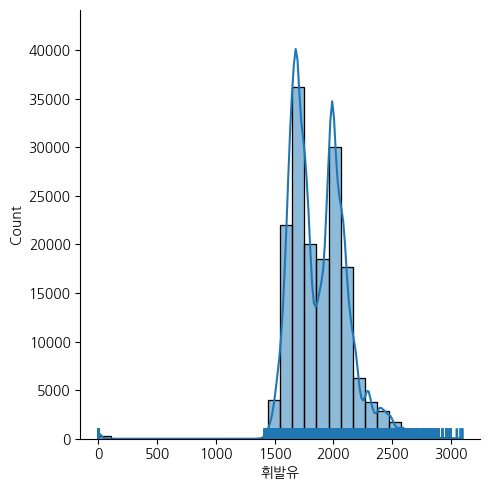

In [49]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################

sns.displot(data=station, x='휘발유',bins=30, rug=True, kde=True);

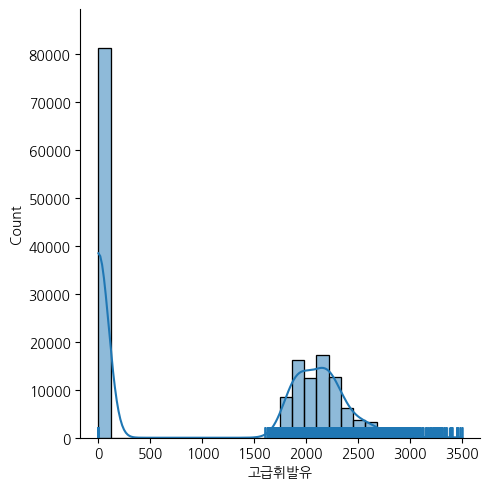

In [50]:
sns.displot(data=station, x='고급휘발유',bins=30, rug=True, kde=True);
plt.show()

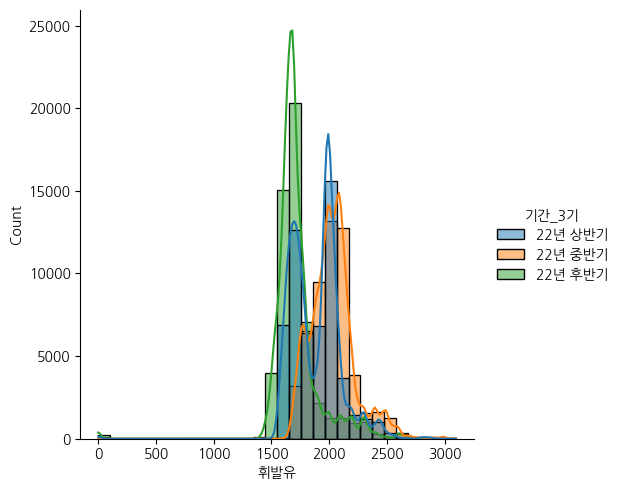

In [66]:
# 기간도별 휘발유/고급 휘발유 사용량
sns.displot(data=station, x='휘발유',hue="기간_3기",bins=30 , kde=True);

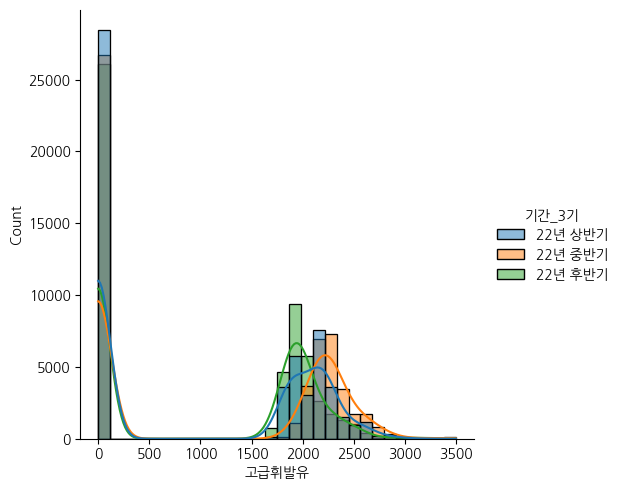

In [87]:
sns.displot(data=station, x='고급휘발유',hue="기간_3기",bins=30 , kde=True);
# 고급휘발유랑 휘발유 가격이 싸진거같음...

In [63]:
result=pd.cut(station.기간, bins=3,labels=["22년 상반기","22년 중반기","22년 후반기"] )
result.value_counts()
station["기간_3기"]=result

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일,기간_3기
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,금,22년 상반기
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,토,22년 상반기
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,일,22년 상반기
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,월,22년 상반기
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,화,22년 상반기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,월,22년 후반기
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,화,22년 후반기
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,수,22년 후반기
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,목,22년 후반기


<Figure size 3000x1000 with 0 Axes>

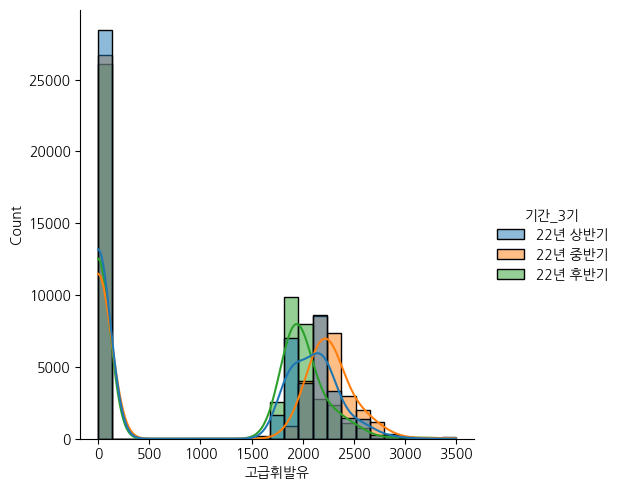

<Figure size 3000x1000 with 0 Axes>